Classification of Handwritten digits images that represent single digit

In [13]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

MNIST

In [2]:
from keras.datasets import mnist

Using TensorFlow backend.


In [4]:
(X_train, y_train),(X_test,y_test) = mnist.load_data('D:/git/DeepLearning/CNN/dataset/mnist.npz')

11493376/11490434 [==============================] - 37s 3us/step


In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
X_test.shape

(10000, 28, 28)

In [8]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

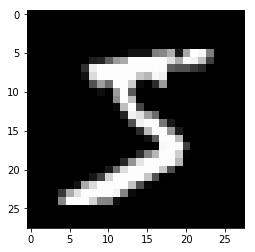

In [7]:
plt.imshow(X_train[0],cmap='gray')

In [9]:
#reshape to get 2d object array
X_train = X_train.reshape(-1,28*28)
X_test = X_test.reshape(-1,28*28)

In [10]:
X_train.shape

(60000, 784)

In [11]:
#converting values 0 to 255 to b/e 0 to 1 
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.0
X_test /= 255.0

In [12]:
X_train[0]

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [14]:
from keras.utils.np_utils import to_categorical

In [15]:
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [19]:
y_train[0]

5

In [20]:
# value 1 for the digit 5. others are 0
y_train_cat[0]

array([ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.])

In [18]:
#10 categories from digit 0-9
y_train_cat.shape

(60000, 10)

In [17]:
y_test_cat.shape

(10000, 10)

Fully connected model to classify images

In [21]:
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K

K.clear_session()

model = Sequential()
model.add(Dense(512,input_dim =28*28,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [22]:
h = model.fit(X_train,y_train_cat,batch_size=128,epochs=10,verbose=1,validation_split=0.3)

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 18s 421us/step - loss: 0.3336 - acc: 0.8962 - val_loss: 0.1327 - val_acc: 0.9598
Epoch 2/10
42000/42000 [==============================] - 11s 267us/step - loss: 0.1132 - acc: 0.9655 - val_loss: 0.1195 - val_acc: 0.9645
Epoch 3/10
42000/42000 [==============================] - 15s 351us/step - loss: 0.0724 - acc: 0.9775 - val_loss: 0.1845 - val_acc: 0.9468
Epoch 4/10
42000/42000 [==============================] - 13s 314us/step - loss: 0.0530 - acc: 0.9837 - val_loss: 0.1581 - val_acc: 0.9602
Epoch 5/10
42000/42000 [==============================] - 13s 310us/step - loss: 0.0374 - acc: 0.9881 - val_loss: 0.1120 - val_acc: 0.9732
Epoch 6/10
42000/42000 [==============================] - 11s 271us/step - loss: 0.0311 - acc: 0.9902 - val_loss: 0.1324 - val_acc: 0.9716
Epoch 7/10
42000/42000 [==============================] - 11s 273us/step - loss: 0.0253 - acc: 0.9921 - val_loss: 0.

Text(0.5,0,'Epochs')

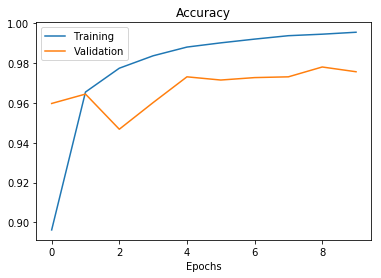

In [27]:
plt.plot(h.history['acc'])
plt.plot(h.history['val_acc'])
plt.legend(['Training','Validation'])
plt.title('Accuracy')
plt.xlabel('Epochs')
#overfitting since train accuracy > validation accuracy

In [26]:
test_accuracy = model.evaluate(X_test,y_test_cat)[1]
test_accuracy

10000/10000 [==============================] - 3s 318us/step


0.98080000000000001

Tensor Math

In [ ]:
A = np.random.randint(10,siz)